In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
iDataSet=pd.read_csv("imagedataset.csv")
qDataSet=pd.read_csv("Filtered_Quotes(0-1500).csv")

In [4]:
images=np.array(iDataSet)
quotes=np.array(qDataSet)

In [30]:
def MatchAQuote(qCats,quote,qTags):
    tempScore=[]
    for image in images:
        iName=image[0]
        iCats=image[1]
        iTags=image[2]
        matchCats=matchWords(qCats.split(','),iCats.split(','))
        matchTags=matchWords(qTags.split(','),iTags.split(','))
        score1=len(matchCats)*5
        score2=len(matchTags)
        if score1 + score2 > 5:
            details={
                "iName":iName,
                "scores":(score1,score2),
                "mCats":matchCats,
                "mTags":matchTags,
                "mScore":score1+score2
            }
            tempScore.append(details)
    tempScore=sorted(tempScore, key = lambda i: i['mScore'],reverse=True)
    return tempScore

In [31]:
def matchWords(a,b):
    matches=[]
    for w in a:
        for i in b:
            if w.lower()==i.lower():
                matches.append(w.lower())
    return matches

In [32]:
def candidates(sample):
    cats=sample[0]
    quote=sample[1]
    tags=sample[2]
    print("Cats are: ",cats)
    print("Quote is: ",quote)
    print("Tags are: ",tags)
    tempScore=MatchAQuote(cats,quote,tags)
    print("\nMatched Candidates are: \n")
    for item in tempScore:
        imgName=item["iName"]
        print("image name: ",imgName)
        print("scores: ",item["scores"])
        print("Matching Score is: ",item["mScore"])
        print("Matched Cats are: ",item["mCats"])
        print("Matched Tags are: ",item["mTags"])
        print()
        plt.figure()
        head,sep,tail=imgName.partition('_')
        IMG=Image.open("../images/"+head+"/"+imgName+".png")
        plt.imshow(IMG)
        plt.show()

Cats are:  arts
Quote is:  Art is the child of Nature; yes, her darling child, in whom we trace the features of the mother's face, her aspect and her attitude.
Tags are:  Nature,Attitude,Mother

Matched Candidates are: 

image name:  arts_15
scores:  (5, 2)
Matching Score is:  7
Matched Cats are:  ['arts']
Matched Tags are:  ['attitude', 'mother']



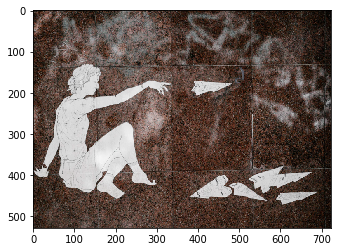

image name:  arts_3
scores:  (5, 1)
Matching Score is:  6
Matched Cats are:  ['arts']
Matched Tags are:  ['nature']



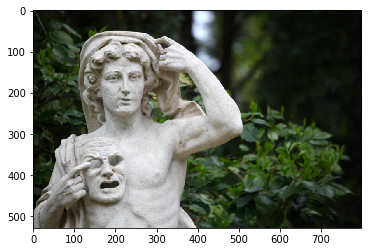

image name:  arts_12
scores:  (5, 1)
Matching Score is:  6
Matched Cats are:  ['arts']
Matched Tags are:  ['nature']



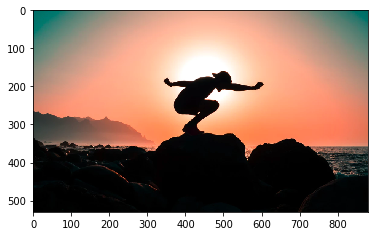

image name:  arts_17
scores:  (5, 1)
Matching Score is:  6
Matched Cats are:  ['arts']
Matched Tags are:  ['nature']



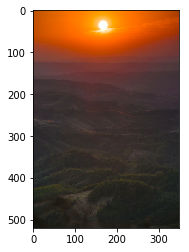

In [43]:
candidates(quotes[300])